In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Loading the data


In [2]:
#hours of study, score in exams
# 1 2
# 2 4
# 3 6
# 4 8
# 5 10

data = np.array([[1,2],[2,4],[3,6],[4,8],[5,10]])
x = data[:,0]
y = data[:,1]

x_train = x[:3]
y_train = y[:3]

x_test = x[3:]
y_test = y[3:]

print(f"x : {x}")
print(f"y : {y}")

print(f"x_train : {x_train}")
print(f"y_train : {y_train}")

print(f"x_test : {x_test}")
print(f"y_test : {y_test}")


x : [1 2 3 4 5]
y : [ 2  4  6  8 10]
x_train : [1 2 3]
y_train : [2 4 6]
x_test : [4 5]
y_test : [ 8 10]


# ii. Implementing Gradient Descent

In [3]:


def h_x(w0, w1, x):
    return w0 + w1 * x

def test(w0, w1, x, y):
    y_pred = h_x(w0, w1, x)
    return 1/(2*len(x)) * np.sum((y_pred - y)**2)


def cost(w0, w1, x, y):
    return 1 / (2 * len(x)) * np.sum((h_x(w0, w1, x) - y) ** 2)

def gradient_descent(w0, w1, x, y, alpha):
    w0_new = w0 - alpha * 1 / len(x) * np.sum(h_x(w0, w1, x) - y)
    w1_new = w1 - alpha * 1 / len(x) * np.sum((h_x(w0, w1, x) - y) * x)
    return w0_new, w1_new

def train(x, y, alpha, epochs):
    w0 = 1
    w1 = 1
    costs = []
    for i in range(epochs):
        w0, w1 = gradient_descent(w0, w1, x, y, alpha)
        current_cost = cost(w0, w1, x, y)
        costs.append(current_cost)
        print(f"epoch : {i+1}, cost : {current_cost}")
    return w0, w1, costs

w0_GD, w1_GD, costs_GD = train(x_train, y_train, 0.1, 1000)

print(f"w0_GD : {w0_GD}, w1_GD : {w1_GD}")  
print(f"costs_GD : {costs_GD}")
print(f"cost_GD : {cost(w0_GD, w1_GD, x_train, y_train)}")
print(f"\nFinal Equation for GD: y = {w0_GD} + {w1_GD}x")

y_pred_GD = h_x(w0_GD, w1_GD, x_test)
print(f"y_pred_GD : {y_pred_GD}")

print(f"\nThe final equation for GD is y = {w0_GD} + {w1_GD}x")


epoch : 1, cost : 0.24648148148148136
epoch : 2, cost : 0.12814547325102893
epoch : 3, cost : 0.10278092432556021
epoch : 4, cost : 0.09590152194761972
epoch : 5, cost : 0.09273262271572044
epoch : 6, cost : 0.09034277891818157
epoch : 7, cost : 0.08814953903836756
epoch : 8, cost : 0.08603637440538939
epoch : 9, cost : 0.08397919118272393
epoch : 10, cost : 0.08197225244860462
epoch : 11, cost : 0.08001348507388577
epoch : 12, cost : 0.07810156495161383
epoch : 13, cost : 0.07623533834953557
epoch : 14, cost : 0.07441370662032201
epoch : 15, cost : 0.07263560282628585
epoch : 16, cost : 0.07089998660651031
epoch : 17, cost : 0.06920584267403251
epoch : 18, cost : 0.06755218004459349
epoch : 19, cost : 0.06593803142179092
epoch : 20, cost : 0.06436245262429229
epoch : 21, cost : 0.06282452203216009
epoch : 22, cost : 0.06132334004748502
epoch : 23, cost : 0.05985802856812018
epoch : 24, cost : 0.05842773047403235
epoch : 25, cost : 0.05703160912593662
epoch : 26, cost : 0.0556688478759

# iii. Implement Stochastic Gradient Descent Algortihm (SGD)

In [4]:
def stochastic_gradient_descent(w0, w1, x, y, alpha):
    for i in range(len(x)):
        w0 = w0 - alpha * (h_x(w0, w1, x[i]) - y[i])
        w1 = w1 - alpha * (h_x(w0, w1, x[i]) - y[i]) * x[i]
    return w0, w1

def train_stochastic(x, y, alpha, epochs):
    w0 = 1
    w1 = 1
    costs = []
    for i in range(epochs):
        w0, w1 = stochastic_gradient_descent(w0, w1, x, y, alpha)
        current_cost = cost(w0, w1, x, y)
        costs.append(current_cost)
        print(f"epoch : {i+1}, cost : {current_cost}")
    return w0, w1, costs

w0_SGD, w1_SGD, costs_SGD = train_stochastic(x_train, y_train, 0.1, 1000)

print(f"The equation for SGD is y = {w0_SGD} + {w1_SGD}x")

y_pred_SGD = h_x(w0_SGD, w1_SGD, x_test)
print(f"y_pred_SGD : {y_pred_SGD}")

print(f"\nThe final equation for SGD is y = {w0_SGD} + {w1_SGD}x")

epoch : 1, cost : 0.12292469333333331
epoch : 2, cost : 0.12499283090212282
epoch : 3, cost : 0.11513748618088278
epoch : 4, cost : 0.1055764421210143
epoch : 5, cost : 0.09679033706077145
epoch : 6, cost : 0.08873466600261029
epoch : 7, cost : 0.08134942327825473
epoch : 8, cost : 0.074578841200459
epoch : 9, cost : 0.06837176376855378
epoch : 10, cost : 0.06268129144195017
epoch : 11, cost : 0.05746442800752906
epoch : 12, cost : 0.052681755756268905
epoch : 13, cost : 0.048297137651827554
epoch : 14, cost : 0.044277444285482054
epoch : 15, cost : 0.04059230355610492
epoch : 16, cost : 0.03721387118387147
epoch : 17, cost : 0.0341166203237436
epoch : 18, cost : 0.031277148689086695
epoch : 19, cost : 0.028674001728079174
epoch : 20, cost : 0.026287510516863878
epoch : 21, cost : 0.024099643144595912
epoch : 22, cost : 0.02209386846747158
epoch : 23, cost : 0.02025503120229371
epoch : 24, cost : 0.01856923741579799
epoch : 25, cost : 0.017023749544519354
epoch : 26, cost : 0.015606890

# iv. Evaluating the models

In [5]:
# no_of_decimal_places = 4

# w0_GD = w0_GD.__round__(no_of_decimal_places)
# w1_GD = w1_GD.__round__(no_of_decimal_places)
# w0_SGD = w0_SGD.__round__(no_of_decimal_places)
# w1_SGD = w1_SGD.__round__(no_of_decimal_places)


print(f"w0_GD : {w0_GD}, w1_GD : {w1_GD}")
print(f"The equation for GD is y = {w0_GD} + {w1_GD}x")
print()
print(f"w0_SGD : {w0_SGD}, w1_SGD : {w1_SGD}")
print(f"The equation for SGD is y = {w0_SGD} + {w1_SGD}x")



w0_GD : 6.757865003476723e-06, w1_GD : 1.999997027203586
The equation for GD is y = 6.757865003476723e-06 + 1.999997027203586x

w0_SGD : 3.238333032412566e-15, w1_SGD : 1.9999999999999987
The equation for SGD is y = 3.238333032412566e-15 + 1.9999999999999987x


In [6]:
print("predicting using the GD model")
for i in range(len(x_test)):
    print(f"Actual : {y_test[i]}, Predicted : {h_x(w0_GD, w1_GD, x_test[i])}")
print()

print("predicting using the SGD model")
for i in range(len(x_test)):
    print(f"Actual : {y_test[i]}, Predicted : {h_x(w0_SGD, w1_SGD, x_test[i])}")
print()


cost_GD = test(w0_GD, w1_GD, x_test, y_test)
cost_SGD = test(w0_SGD, w1_SGD, x_test, y_test)

print(f"Cost for GD : {cost_GD}")
print(f"Cost for SGD : {cost_SGD}")

predicting using the GD model
Actual : 8, Predicted : 7.999994866679348
Actual : 10, Predicted : 9.999991893882934

predicting using the SGD model
Actual : 8, Predicted : 7.999999999999998
Actual : 10, Predicted : 9.999999999999996

Cost for GD : 2.3015028703186446e-11
Cost for SGD : 3.944304526105059e-30


# Plotting the regression lines and cost function convergence

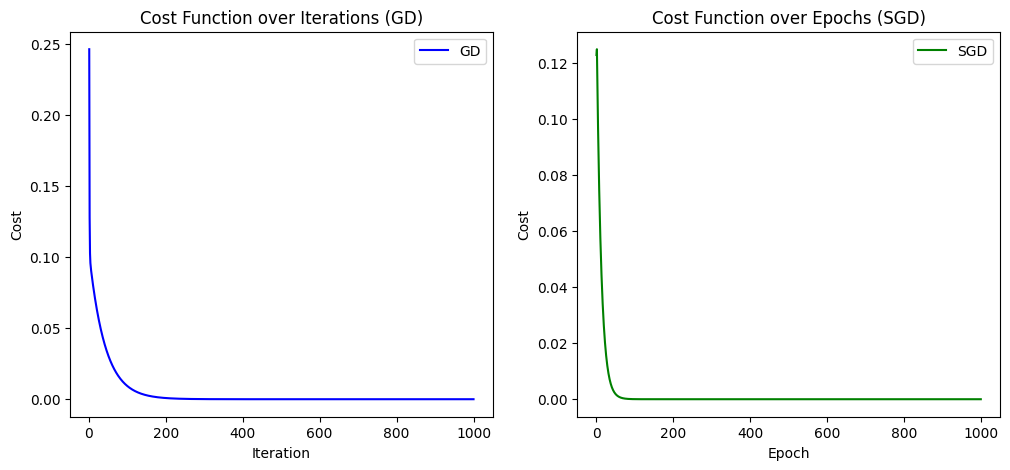

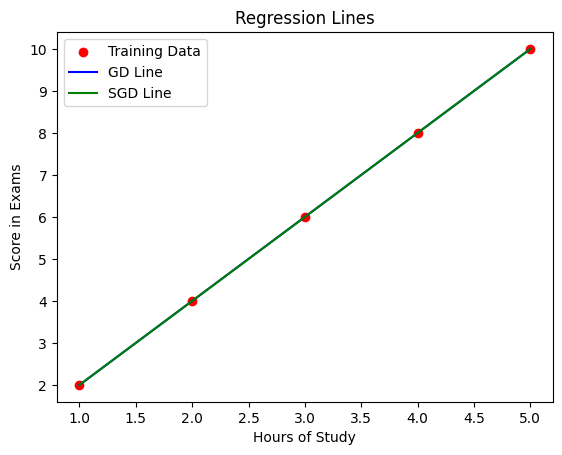

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 1001), costs_GD, label='GD', color='blue')
plt.title('Cost Function over Iterations (GD)')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, 1001), costs_SGD, label='SGD', color='green')
plt.title('Cost Function over Epochs (SGD)')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend()

plt.show()

plt.scatter(x, y, color='red', label='Training Data')
plt.plot(x, h_x(w0_GD, w1_GD, x), color='blue', label='GD Line')
plt.plot(x, h_x(w0_SGD, w1_SGD, x), color='green', label='SGD Line')
plt.title('Regression Lines')
plt.xlabel('Hours of Study')
plt.ylabel('Score in Exams')
plt.legend()
plt.show()

